# Importing all the required libraries

In [2]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
from warnings import filterwarnings
filterwarnings('ignore')
pd.options.display.max_columns = None
pd.options.display.max_rows = None    
pd.options.display.float_format = '{:.6f}'.format
from sklearn.model_selection import train_test_split
import statsmodels
import statsmodels.api as sm
import statsmodels.stats.api as sms
from statsmodels.compat import lzip
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.graphics.gofplots import qqplot
from statsmodels.stats.anova import anova_lm
from statsmodels.formula.api import ols
from statsmodels.tools.eval_measures import rmse
from scipy import stats
from scipy.stats import shapiro
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error

# Reading the dataset

In [3]:
df=pd.read_csv('auto_mpg.csv',index_col=0)
df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,name
0,18.000000,8,307.000000,130.0,3504.000000,12.000000,70,1,chevrolet chevelle malibu
1,15.000000,8,350.000000,165.0,3693.000000,11.500000,70,1,buick skylark 320
2,18.000000,8,318.000000,150.0,3436.000000,11.000000,70,1,plymouth satellite
3,16.000000,8,304.000000,150.0,3433.000000,12.000000,70,1,amc rebel sst
4,17.000000,8,302.000000,140.0,3449.000000,10.500000,70,1,ford torino


# Checking the datatypes and making required changes.

In [4]:
df.nunique()

mpg             129
cylinders         5
displacement     82
horsepower       94
weight          351
acceleration     95
year             13
origin            3
name            305
dtype: int64

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    398 non-null    object 
 4   weight        398 non-null    float64
 5   acceleration  398 non-null    float64
 6   year          398 non-null    int64  
 7   origin        398 non-null    int64  
 8   name          398 non-null    object 
dtypes: float64(4), int64(3), object(2)
memory usage: 31.1+ KB


- >**Changing the datatype of the Horsepower column from 'object' to 'float'.**

In [6]:
df.horsepower = pd.to_numeric(df.horsepower, errors='coerce')

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    392 non-null    float64
 4   weight        398 non-null    float64
 5   acceleration  398 non-null    float64
 6   year          398 non-null    int64  
 7   origin        398 non-null    int64  
 8   name          398 non-null    object 
dtypes: float64(5), int64(3), object(1)
memory usage: 31.1+ KB


In [8]:
df.columns

Index(['mpg', 'cylinders', 'displacement', 'horsepower', 'weight',
       'acceleration', 'year', 'origin', 'name'],
      dtype='object')

In [9]:
# drop the column 'name' using drop()
df = df.drop('name',axis=1)
df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin
0,18.000000,8,307.000000,130.000000,3504.000000,12.000000,70,1
1,15.000000,8,350.000000,165.000000,3693.000000,11.500000,70,1
2,18.000000,8,318.000000,150.000000,3436.000000,11.000000,70,1
3,16.000000,8,304.000000,150.000000,3433.000000,12.000000,70,1
4,17.000000,8,302.000000,140.000000,3449.000000,10.500000,70,1


# Checking for  missing values and removing outliers if any.

In [10]:
Total = df.isnull().sum().sort_values(ascending=False)          
Percent = (df.isnull().sum()*100/df.isnull().count()).sort_values(ascending=False)   
missing_data = pd.concat([Total, Percent], axis=1, keys=['Total', 'Percentage of Missing Values'])    
missing_data

,Total,Percentage of Missing Values
horsepower,6,1.507538
origin,0,0.000000
year,0,0.000000
acceleration,0,0.000000
weight,0,0.000000
displacement,0,0.000000
cylinders,0,0.000000
mpg,0,0.000000


In [11]:
df.shape

(398, 8)

In [12]:
df.dropna(inplace=True)

In [13]:
df.shape

(392, 8)

<AxesSubplot:>

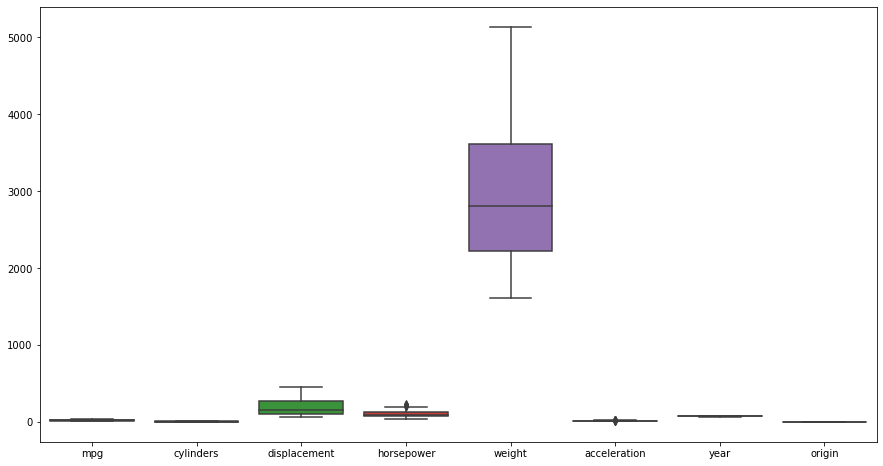

In [14]:
plt.figure(figsize = (15,8))
sns.boxplot(data=df)

- > **Since the graph is very unclear, we will do a boxplot by exclusing the variable 'weight' as we can see that it has no outliers**

<AxesSubplot:>

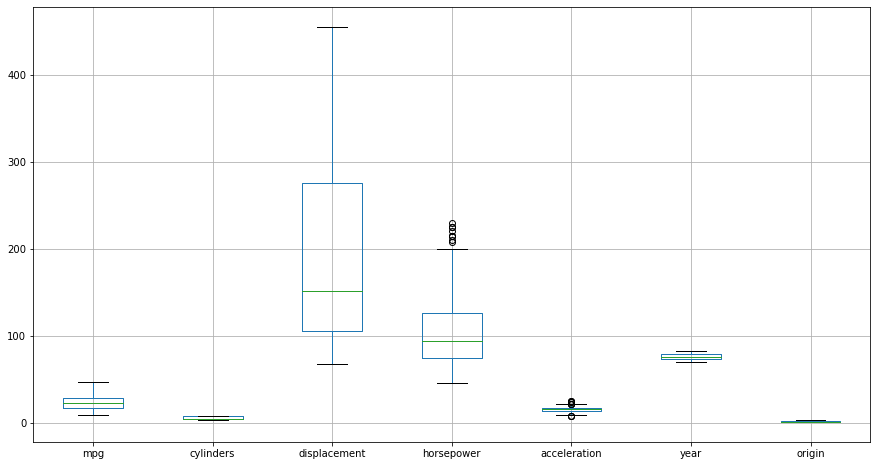

In [15]:
df1=df.drop('weight',axis=1)
plt.figure(figsize = (15,8))
df1.boxplot()

In [16]:
df.shape

(392, 8)

In [17]:
# Removing the outliers from all variables

Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1

df = df[~((df < (Q1 - 1.5 * IQR)) | (df > (Q3 + 1.5 * IQR))).any(axis=1)]
df.shape

(372, 8)

- >**Here, from the new shape obtained we can see that 20 outliers has been removed.**

# Correlation Matrix

In [18]:
dfa= df.drop(['year','cylinders','origin'],axis=1)

In [19]:
dfa.describe()

,mpg,displacement,horsepower,weight,acceleration
count,372.000000,372.000000,372.000000,372.000000,372.000000
mean,23.652688,188.939516,101.879032,2944.045699,15.546237
std,7.632497,98.717407,33.661689,829.283502,2.402304
min,9.000000,68.000000,46.000000,1613.000000,9.500000
25%,17.600000,105.000000,75.750000,2220.000000,14.000000
50%,23.000000,146.000000,92.000000,2764.500000,15.500000
75%,29.125000,258.000000,120.000000,3542.000000,17.000000
max,46.600000,429.000000,200.000000,5140.000000,21.800000


<AxesSubplot:>

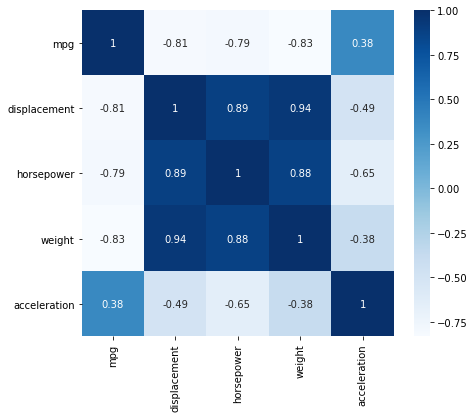

In [20]:
plt.figure(figsize=(7,6))
sns.heatmap(dfa.corr(),annot=True,cmap='Blues')

# Normalizing the data

In [21]:
col_list=dfa.columns
col_list
for i in range(5):
    print('Shapiro test for',col_list[i])
    print(shapiro(dfa[col_list[i]]),'\n')
    

Shapiro test for mpg
ShapiroResult(statistic=0.968883216381073, pvalue=3.915240824881039e-07) 

Shapiro test for displacement
ShapiroResult(statistic=0.8805570602416992, pvalue=2.158252125702574e-16) 

Shapiro test for horsepower
ShapiroResult(statistic=0.9209126830101013, pvalue=4.287764533619093e-13) 

Shapiro test for weight
ShapiroResult(statistic=0.9426375031471252, pvalue=8.293415953986027e-11) 

Shapiro test for acceleration
ShapiroResult(statistic=0.9929425716400146, pvalue=0.07763781398534775) 



- >**Since, only 'acceleration' column is normally distributed, we will use MinMax Transformation for all columns.**

In [22]:
df.columns

Index(['mpg', 'cylinders', 'displacement', 'horsepower', 'weight',
       'acceleration', 'year', 'origin'],
      dtype='object')

In [23]:
from sklearn.preprocessing import MinMaxScaler

min_max = MinMaxScaler()

df['cylinders'] = min_max.fit_transform(df[['cylinders']])
df['displacement'] = min_max.fit_transform(df[['displacement']])
df['horsepower'] = min_max.fit_transform(df[['horsepower']])
df['weight'] = min_max.fit_transform(df[['weight']])
df['acceleration'] = min_max.fit_transform(df[['acceleration']])
df['year'] = min_max.fit_transform(df[['year']])
df['origin'] = min_max.fit_transform(df[['origin']])
df['mpg'] = min_max.fit_transform(df[['mpg']])

In [24]:
df.describe()

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin
count,372.000000,372.000000,372.000000,372.000000,372.000000,372.000000,372.000000,372.000000
mean,0.389699,0.482258,0.335013,0.362851,0.377387,0.491564,0.509185,0.297043
std,0.202992,0.334547,0.273455,0.218582,0.235124,0.195309,0.302372,0.408557
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.228723,0.200000,0.102493,0.193182,0.172101,0.365854,0.250000,0.000000
50%,0.372340,0.200000,0.216066,0.298701,0.326481,0.487805,0.500000,0.000000
75%,0.535239,0.600000,0.526316,0.480519,0.546924,0.609756,0.750000,0.500000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


- >**Here, we can see from the min and max values of the variables have been normalised as all of their ranges now range from (0,1).**

# Checking for Multicollinearity

In [25]:
df_feature = df.drop('mpg' ,axis = 1)

In [26]:
vif = pd.DataFrame()
vif["VIF_Factor"] = [variance_inflation_factor(df_feature.values, i) for i in range(df_feature.shape[1])]
vif["Features"] = df_feature.columns
vif.sort_values('VIF_Factor', ascending = False).reset_index(drop = True)

,VIF_Factor,Features
0,58.544132,displacement
1,43.378281,weight
2,36.357511,cylinders
3,22.906720,horsepower
4,5.950786,acceleration
5,3.710437,year
6,2.573151,origin


# PCA


In [27]:
from sklearn.decomposition import PCA
pca = PCA(n_components=4)
df_pca=pca.fit_transform(df_feature)

# Train Test Split

In [28]:
df_target = df['mpg']

In [29]:
y=df_target

X_train, X_test, y_train, y_test = train_test_split(df_pca, y, random_state = 1, test_size = 0.3)
print('X_train', X_train.shape)
print('y_train', y_train.shape)
print('X_test', X_test.shape)
print('y_test', y_test.shape)

X_train (260, 4)
y_train (260,)
X_test (112, 4)
y_test (112,)


In [30]:
X_train1 = X_train

# **K-fold Cross-Validation**

In [31]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn import linear_model

In [32]:
model = LinearRegression()
model1  = Ridge(alpha=1, max_iter = 400)
model2 = linear_model.Lasso(alpha=0.05 , max_iter = 100)
cv = KFold(n_splits=5, random_state=1, shuffle=True)
scores = cross_val_score(model, df_pca, y, scoring='r2', cv=cv, n_jobs=-1)
cv1 = KFold(n_splits=5, random_state=1, shuffle=True)
scores1 = cross_val_score(model1, df_pca, y, scoring='r2', cv=cv, n_jobs=-1)
cv2 = KFold(n_splits=5, random_state=1, shuffle=True)
scores2 = cross_val_score(model2, df_pca, y, scoring='r2', cv=cv, n_jobs=-1)

In [33]:
print('For Multiple linear regression model:', scores)
print('\nFor Ridge regression model:', scores1)
print('\nFor Lasso regression model:',scores2)

For Multiple linear regression model: [0.73278845 0.79642346 0.84812739 0.80585718 0.71697234]

For Ridge regression model: [0.73394404 0.7960258  0.8497716  0.80415027 0.7159275 ]

For Lasso regression model: [0.52960412 0.52147054 0.6047946  0.55403248 0.48962719]


# Grid-Search CV

In [34]:
from sklearn.model_selection import GridSearchCV

In [35]:
parameters1 = {'alpha':[1.0, 2 ,0.5 , 3], 
                     'max_iter' : [400 , 500 , 250 ,370]}

parameters2 = {'alpha':[ 0.1, 0.2 , 0.05 , 0.07 ],
               'max_iter':[100,150,200,250,300,350,450,500]}


In [36]:
from sklearn.linear_model import Ridge
reg1  = Ridge()
from sklearn import linear_model
reg2 = linear_model.Lasso()

In [37]:
riggrid = GridSearchCV( reg1 , param_grid =parameters1 , cv=5, n_jobs=-1)
riggrid.fit(X_train1, y_train)
lassogrid = GridSearchCV( reg2 , param_grid =parameters2 , cv=5, n_jobs=-1)
lassogrid.fit(X_train1, y_train)

GridSearchCV(cv=5, estimator=Lasso(), n_jobs=-1,
             param_grid={'alpha': [0.1, 0.2, 0.05, 0.07],
                         'max_iter': [100, 150, 200, 250, 300, 350, 450, 500]})

In [38]:
print(" Results from Grid Search for Ridge Regression model " )
print("\n The best estimator across ALL searched params:\n",riggrid.best_estimator_)
print("\n The best score across ALL searched params:\n", riggrid.best_score_)
print("\n The best parameters across ALL searched params:\n",riggrid.best_params_)

 Results from Grid Search for Ridge Regression model 

 The best estimator across ALL searched params:
 Ridge(max_iter=400)

 The best score across ALL searched params:
 0.7716512809015648

 The best parameters across ALL searched params:
 {'alpha': 1.0, 'max_iter': 400}


In [39]:
print(" Results from Grid Search for Lasso Regression model " )
print("\n The best estimator across ALL searched params:\n",lassogrid.best_estimator_)
print("\n The best score across ALL searched params:\n", lassogrid.best_score_)
print("\n The best parameters across ALL searched params:\n",lassogrid.best_params_)

 Results from Grid Search for Lasso Regression model 

 The best estimator across ALL searched params:
 Lasso(alpha=0.05, max_iter=100)

 The best score across ALL searched params:
 0.5338411423500781

 The best parameters across ALL searched params:
 {'alpha': 0.05, 'max_iter': 100}


# MLR 

In [40]:
X_train=sm.add_constant(X_train)

In [41]:
MLR_full_model = sm.OLS(y_train, X_train).fit()
MLR_full_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    mpg   R-squared:                       0.784
Model:                            OLS   Adj. R-squared:                  0.781
Method:                 Least Squares   F-statistic:                     231.7
Date:                Sun, 16 May 2021   Prob (F-statistic):           1.22e-83
Time:                        19:29:26   Log-Likelihood:                 244.37
No. Observations:                 260   AIC:                            -478.7
Df Residuals:                     255   BIC:                            -460.9
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.3918      0.006     66.082      0.000       0.380       0.403
x1            -0.2874      0.010    -29.163      0.000      -0.307      -0.268
x2            -0.1426      0.019     -7.526      0.000      -0.180      -0.105
x3            -0.1011      0.022     -4.647      0.000      -0.144      -0.058
x4            -0.1288      0.036     -3.545      0.000      -0.200      -0.057
==============================================================================
Omnibus:                       28.524   Durbin-Watson:                   1.805
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               58.392
Skew:                           0.563   Prob(JB):                     2.09e-13
Kurtosis:                       5.030   Cond. No.                         6.14
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

- >**The R-squared value obtained from this model is 0.703 which means that the above model explains 70.3% of the variation in mpg.**

- > **From the summary we see that p-values of x1,x2 and x3 are less than alpha(0.5),hence these features contribute to the target variable.**


# MLR (using sklearn)

In [42]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression().fit(X_train1, y_train)
reg.score(X_train1, y_train)

0.7842394686801729

In [43]:
reg.intercept_

0.391782415429493

In [44]:
reg.coef_

array([-0.28743954, -0.14259086, -0.10113525, -0.12877502])

In [45]:
y_pred = reg.predict(X_test)

# Ridge Regression Model

In [46]:
from sklearn.linear_model import Ridge
reg1  = Ridge(alpha=1, max_iter = 400)
reg1.fit(X_train1, y_train)

Ridge(alpha=1, max_iter=400)

In [47]:
y_pred1 = reg1.predict(X_test)

# Lasso Regression Model

In [48]:
from sklearn import linear_model
reg2 = linear_model.Lasso(alpha=0.05 , max_iter = 100)
reg2.fit(X_train1 , y_train)

Lasso(alpha=0.05, max_iter=100)

In [49]:
y_pred2 = reg2.predict(X_test)

# Finding RMSE values for all models

In [50]:
def rmse( ytrue , ypred):

  from sklearn.metrics import mean_squared_error
  result = mean_squared_error(ytrue, ypred, squared=False)
  return result

In [51]:
# Test RMSE
print('For Linear regression model', rmse(y_test, y_pred))
print('\nFor Ridge model',rmse(y_test, y_pred1))
print('\nFor Lasso regression model', rmse(y_test , y_pred2)) 

For Linear regression model 0.09318522974716402

For Ridge model 0.09287296355117097

For Lasso regression model 0.1330940230937972


In [52]:
train_pred = reg.predict(X_train1)
train_pred1 = reg1.predict(X_train1)
train_pred2 = reg2.predict(X_train1)
train_pred3 = reg2.predict(X_train1)

In [53]:
# Train RMSE
print('For Linear regression model', rmse(y_train, train_pred))
print('\nFor Ridge model',rmse(y_train, train_pred1))
print('\nFor Lasso regression model', rmse(y_train , train_pred2)) 

For Linear regression model 0.0945325252825543

For Ridge model 0.09461201856342588

For Lasso regression model 0.13819487277186313


# R-Square

In [54]:
from sklearn.metrics import r2_score
def r2(yt,yp):
    a=r2_score(yt,yp)
    return a    

In [55]:
print('For Linear Regression :',r2(y_train,train_pred))
print('\nFor Ridge model',r2(y_train, train_pred1))
print('\nFor Lasso regression model', r2(y_train , train_pred2)) 

For Linear Regression : 0.7842394686801729

For Ridge model 0.7838764460295197

For Lasso regression model 0.5389018872757433


# Adj R-Square

In [56]:
Nxtr=len(X_train1)
k=4

In [57]:
def adjr2(r2,n,k):
    result=1-((1-r2)*(n-1)/(n-k-1))
    return result

In [58]:
print('For Linear Regression :',adjr2(r2(y_train,train_pred),Nxtr,k))
print('\nFor Ridge model',adjr2(r2(y_train, train_pred1),Nxtr,k))
print('\nFor Lasso regression model', adjr2(r2(y_train, train_pred2),Nxtr,k))

For Linear Regression : 0.780854989757509

For Ridge model 0.7804862726339042

For Lasso regression model 0.5316689757035981


# Selecting the best model

In [59]:
finalmodel=pd.DataFrame({'Model':['Linear Regression','Ridge model','Lasso regression'],
                         'R-Square':[r2(y_train,train_pred),r2(y_train, train_pred1),r2(y_train , train_pred2)],
                        'Adj R-Square':[adjr2(r2(y_train,train_pred),Nxtr,k),adjr2(r2(y_train,train_pred1),Nxtr,k),adjr2(r2(y_train,train_pred2),Nxtr,k)],
                        'Train RMSE':[rmse(y_train, train_pred),rmse(y_train, train_pred1),rmse(y_train, train_pred2)],
                        'Test RMSE':[rmse(y_test, y_pred),rmse(y_test, y_pred1),rmse(y_test, y_pred2)]})
finalmodel

,Model,R-Square,Adj R-Square,Train RMSE,Test RMSE
0,Linear Regression,0.784239,0.780855,0.094533,0.093185
1,Ridge model,0.783876,0.780486,0.094612,0.092873
2,Lasso regression,0.538902,0.531669,0.138195,0.133094


- >**R-Square and Adjusted R-Square for ElasticNet Regression model were negative so we have omitted ElasticNet regression model.**

#                      Happy Machine Learning, Thank you!!! 